In [1]:
#!pip install -r requirements.txt

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
patients = pd.read_csv('heart_failure_clinical_records_dataset.train.csv')
#patients = pd.read_csv('heart_failure_clinical_records_dataset.train.csv', na_values=['', ' '])
#patients = appointments.replace(['', ' '], [np.nan, np.nan])

In [4]:
patients.shape

(239, 13)

Le dimensioni del dataset risultano essere esigue. Bisognerà stare attenti ad evitare che il modello non faccia overfitting, dovuto ad una complessità elevata del modello in condizioni di poche osservazioni disponibili. 

Potrebbe risultare un'alta accuracy dopo il training del modello, ma non necessariamente ciò sarà dovuto ad un'interpretazione adeguata dei dati. Un modo per mitigare questi rischi è l'utilizzo della Cross Validation, in modalità leave-one-out (k-fold con k=N numero di osservazioni del training set)

## Split del dataset in train.csv e test.csv, con salvataggio su disco

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
train_data, test_data = train_test_split(patients, train_size=0.8, test_size=0.2)

La decisione della percentuale di split train/test influisce in modo significativo sulla accuracy del modello. Si è scelto di non impostare valori estremi come 0.5 o 0.9 per la dimensione del training set (e di conseg

In [7]:
print(train_data.shape)
print(test_data.shape)

(191, 13)
(48, 13)


In [8]:
train_data.to_csv('train.csv', index=False)
test_data.to_csv('test.csv', index=False)

## Data Exploration

In [9]:
patients.shape

(239, 13)

In [10]:
patients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239 entries, 0 to 238
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   DEATH_EVENT               239 non-null    int64  
 1   age                       239 non-null    float64
 2   anaemia                   239 non-null    int64  
 3   creatinine_phosphokinase  239 non-null    int64  
 4   diabetes                  239 non-null    int64  
 5   ejection_fraction         239 non-null    int64  
 6   high_blood_pressure       239 non-null    int64  
 7   platelets                 239 non-null    float64
 8   serum_creatinine          239 non-null    float64
 9   serum_sodium              239 non-null    int64  
 10  sex                       239 non-null    int64  
 11  smoking                   239 non-null    int64  
 12  time                      239 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 24.4 KB


In [11]:
patients.describe()

,DEATH_EVENT,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
count,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000
mean,0.297071,61.059975,0.435146,577.083682,0.405858,38.263598,0.351464,262427.450209,1.387364,136.418410,0.644351,0.313808,132.297071
std,0.457927,11.999013,0.496817,946.937475,0.492088,11.651161,0.478430,94272.495618,0.994975,4.440152,0.479714,0.465013,78.350857
min,0.000000,40.000000,0.000000,23.000000,0.000000,15.000000,0.000000,47000.000000,0.500000,113.000000,0.000000,0.000000,4.000000
25%,0.000000,52.000000,0.000000,111.500000,0.000000,30.000000,0.000000,212500.000000,0.900000,134.000000,0.000000,0.000000,73.500000
50%,0.000000,60.000000,0.000000,245.000000,0.000000,38.000000,0.000000,263000.000000,1.100000,137.000000,1.000000,0.000000,119.000000
75%,1.000000,69.500000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.400000,139.000000,1.000000,1.000000,205.500000
max,1.000000,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,742000.000000,9.000000,146.000000,1.000000,1.000000,285.000000


In [12]:
patients.nunique()

DEATH_EVENT                   2
age                          47
anaemia                       2
creatinine_phosphokinase    175
diabetes                      2
ejection_fraction            16
high_blood_pressure           2
platelets                   153
serum_creatinine             38
serum_sodium                 26
sex                           2
smoking                       2
time                        132
dtype: int64

In [13]:
patients.head()

,DEATH_EVENT,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,1,75.000,1,246,0,15,0,127000.00,1.20,137,1,0,10
1,1,75.000,0,99,0,38,1,224000.00,2.50,134,1,0,162
2,1,60.667,1,104,1,30,0,389000.00,1.50,136,1,0,171
3,0,52.000,0,132,0,30,0,218000.00,0.70,136,1,1,112
4,1,94.000,0,582,1,38,1,263358.03,1.83,134,1,0,27


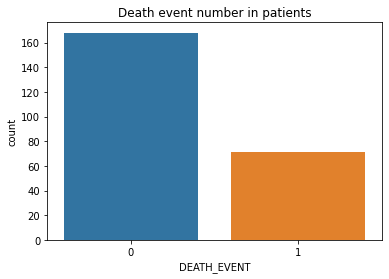

In [14]:
ax = sns.countplot(x='DEATH_EVENT', data=patients).set_title('Death event number in patients')

Il numero di osservazioni per ogni possibile valore dell'evento morte è molto sbilanciato. In un dataset con molte osservazioni potrebbe essere opportuno bilanciarlo eliminando le osservazioni della classe più numerosa. 

In questo caso il dataset è piccolo, ed esistono tecniche (come lo SMOTE) per popolare la classe meno numerosa generando sinteticamente delle osservazioni. Tuttavia questi metodi non sono stati visti a lezione e non verranno usati.

## Analisi delle feature

### Age

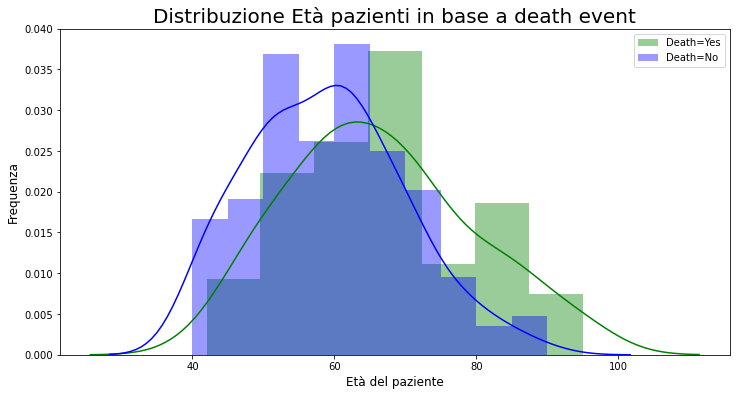

In [27]:
fig = plt.figure(figsize=(12,6))
axis = sns.distplot(patients.loc[(patients['DEATH_EVENT'] == 1),'age'] , color='g', label='Death=Yes')
axis = sns.distplot(patients.loc[(patients['DEATH_EVENT'] == 0),'age'] , color='b', label='Death=No')
plt.title('Distribuzione Età pazienti in base a death event', fontsize = 20)
plt.legend()
plt.xlabel("Età del paziente", fontsize = 12)
plt.ylabel('Frequenza', fontsize = 12);

### Anaemia, Diabetes, High Blood Pressure, Sex, Smoking

### Creatinine Phosphokinase

### Ejection Fraction

### Platelets

### Serum Creatinine

### Serum Sodium

### Time